# Predict MLB

**Predict playoff odds for MLB teams**

## Let's predict odds for playoff

MLB.com provides the stats of the AL/NL teams such as Batting average, OPS (On-base  Plus Slugging), ERA (Earned Runs Average), WHIP(Walks Plus Hits Divided by Innings Pitched), etc. (http://mlb.mlb.com/stats/)

And there are API that provides get some stats of MLB with Python. You need to install it with 
``` pip install MLB-StatsAPI ```


Based on the Hitting, Pitching, and Fielding stats for division winners of the last 10 years,  let's try to make a machine learning model with classification methods. (Logistic Regression)

With this model, let's figure out which team is going to advance to the playoff.

If you only have some interest about the data set, you can find it [here](https://github.com/Teosoft7/predict_mlb/blob/master/mlb_stats/mlb_stading.csv)


In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

# import MLB-StatsAPI
import statsapi as mlb

### Make a data set

MLB.com provide the stats of the MLB teams for Hitting, Pitching, and Fielding.

For more convenience, let's concatenate the 3 different sheets to one sheet.

In [2]:
# Load data from CSV
hitting_df = pd.read_csv('mlb_stats/Hitting.csv')
hitting_df.head(3)

,Year,RK,Team,League,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG▼,OBP,SLG,OPS
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,208,829,569,1253,125,31,0.268,0.339,0.453,0.792
1,NaN,2,Cleveland Indians,AL,162,5595,818,1447,297,19,216,786,554,1189,135,36,0.259,0.332,0.434,0.766
2,NaN,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,150,664,540,1388,128,51,0.258,0.333,0.406,0.740


In [3]:
# Set Year Value for NaN
def set_year(df):
    """Set year value with previous year value for NaN"""
    for i, row in df.iterrows():
        if np.isnan(row['Year']):
            df.loc[i, 'Year'] = year
        else:
            year = row['Year']

In [4]:
# Cleaning for Hitting
set_year(hitting_df)
hitting_df.head(3)

,Year,RK,Team,League,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG▼,OBP,SLG,OPS
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,208,829,569,1253,125,31,0.268,0.339,0.453,0.792
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,216,786,554,1189,135,36,0.259,0.332,0.434,0.766
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,150,664,540,1388,128,51,0.258,0.333,0.406,0.740


In [5]:
# Loading Pitching
pitching_df = pd.read_csv('mlb_stats/Pictching.csv')
pitching_df.head(3)

,Year,RK,Team,League,W,L,ERA,G,GS,SV,SVO,IP,H,R,ER,HR,BB,SO,AVG▼,WHIP
0,2018.0,1,Baltimore Orioles,AL,47,115,5.18,162,162,28,46,1431.0,1552,892,824,234,589,1203,0.276,1.50
1,NaN,2,Kansas City Royals,AL,58,104,4.94,162,162,33,57,1432.0,1542,833,786,205,549,1157,0.275,1.46
2,NaN,3,Texas Rangers,AL,67,95,4.92,162,162,42,56,1431.0,1516,848,783,222,491,1121,0.271,1.40


In [6]:
# Cleaning Pitching
set_year(pitching_df)
pitching_df.head(3)

,Year,RK,Team,League,W,L,ERA,G,GS,SV,SVO,IP,H,R,ER,HR,BB,SO,AVG▼,WHIP
0,2018.0,1,Baltimore Orioles,AL,47,115,5.18,162,162,28,46,1431.0,1552,892,824,234,589,1203,0.276,1.50
1,2018.0,2,Kansas City Royals,AL,58,104,4.94,162,162,33,57,1432.0,1542,833,786,205,549,1157,0.275,1.46
2,2018.0,3,Texas Rangers,AL,67,95,4.92,162,162,42,56,1431.0,1516,848,783,222,491,1121,0.271,1.40


In [7]:
# Loading Fielding
fielding_df = pd.read_csv('mlb_stats/Fielding.csv')
fielding_df.head(3)

,Year,RK,Team,League,G,GS,INN,TC,PO,A,E,DP,SB,CS,SBPCT,PB,C_WP,FPCT▼,DER
0,2018.0,1,Houston Astros,AL,162,1458,13095.0,5797,4365,1369,63,116,60,25,0.706,15,67,0.989,0.707
1,NaN,2,Washington Nationals,NL,162,1458,13014.0,5765,4338,1363,64,115,75,43,0.636,10,42,0.989,0.703
2,NaN,3,Arizona Diamondbacks,NL,162,1458,13167.0,6150,4389,1686,75,152,66,27,0.710,6,69,0.988,0.699


In [8]:
# Cleaning Fielding
set_year(fielding_df)
fielding_df.head(3)

,Year,RK,Team,League,G,GS,INN,TC,PO,A,E,DP,SB,CS,SBPCT,PB,C_WP,FPCT▼,DER
0,2018.0,1,Houston Astros,AL,162,1458,13095.0,5797,4365,1369,63,116,60,25,0.706,15,67,0.989,0.707
1,2018.0,2,Washington Nationals,NL,162,1458,13014.0,5765,4338,1363,64,115,75,43,0.636,10,42,0.989,0.703
2,2018.0,3,Arizona Diamondbacks,NL,162,1458,13167.0,6150,4389,1686,75,152,66,27,0.710,6,69,0.988,0.699


In [9]:
# Make a single data frame with join method
# temp_df = hitting_df.join(pitching_df, on=['Year', 'Team'], how="left")
temp_df = pd.merge(hitting_df, pitching_df, how='left', on=['Year', 'Team'])

In [10]:
temp_df.head()

,Year,RK_x,Team,League_x,G_x,AB,R_x,H_x,2B,3B,...,SVO,IP,H_y,R_y,ER,HR_y,BB_y,SO_y,AVG▼_y,WHIP
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,...,66,1458.2,1305,647,608,176,512,1558,0.237,1.25
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,...,58,1457.1,1349,648,611,200,407,1544,0.242,1.20
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,...,74,1448.1,1236,646,602,164,501,1421,0.230,1.20
3,2018.0,4,Chicago Cubs,NL,163,5624,761,1453,286,34,...,65,1476.1,1319,645,598,157,622,1333,0.240,1.31
4,2018.0,5,Atlanta Braves,NL,162,5582,759,1433,314,29,...,60,1456.2,1236,657,607,153,635,1423,0.229,1.28


In [11]:
df = pd.merge(temp_df, fielding_df, how='left', on=['Year', 'Team'])

In [12]:
df.head()

,Year,RK_x,Team,League_x,G_x,AB,R_x,H_x,2B,3B,...,A,E,DP,SB_y,CS_y,SBPCT,PB,C_WP,FPCT▼,DER
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,...,1366,77,106,64,30,0.681,25,51,0.987,0.694
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,...,1353,83,123,81,29,0.736,9,54,0.986,0.689
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,...,1483,85,136,78,27,0.743,17,55,0.986,0.709
3,2018.0,4,Chicago Cubs,NL,163,5624,761,1453,286,34,...,1675,104,155,84,40,0.677,12,46,0.983,0.702
4,2018.0,5,Atlanta Braves,NL,162,5582,759,1433,314,29,...,1439,80,134,102,28,0.785,13,61,0.986,0.710


#### Get rank by year from MLB api

In [13]:
# get stading from mlb api
standing_2018 = mlb.standings(season=2018, standingsTypes='byLeague')
print(standing_2018)

American League East
Rank Team                   W   L   GB  (E#) WC Rank WC GB (E#)
 1   Boston Red Sox        108 54   -    -      -      -    E  
 2   New York Yankees      100 62  8.0   E      1    +3.0   -  
 3   Tampa Bay Rays        90  72  18.0  E      3     7.0   E  
 4   Toronto Blue Jays     73  89  35.0  E      7    24.0   E  
 5   Baltimore Orioles     47  115 61.0  E     12    50.0   E  

American League West
Rank Team                   W   L   GB  (E#) WC Rank WC GB (E#)
 1   Houston Astros        103 59   -    -      -      -    E  
 2   Oakland Athletics     97  65  6.0   E      2      -    -  
 3   Seattle Mariners      89  73  14.0  E      4     8.0   E  
 4   Los Angeles Angels    80  82  23.0  E      5    17.0   E  
 5   Texas Rangers         67  95  36.0  E      8    30.0   E  

American League Central
Rank Team                   W   L   GB  (E#) WC Rank WC GB (E#)
 1   Cleveland Indians     91  71   -    -      -      -    E  
 2   Minnesota Twins       78  84  1

In [14]:
# Set the rank for dataframe with mlb api standings
prev_year = ''
for i, row in df.iterrows():
    year = row['Year']
    team = row['Team']
    
    # get standings by calling the mlb API
    if prev_year != year:
        standings = mlb.standings(season=year).split('\n')
    prev_year = year

    for standing in standings:
        if standing.find(team) != -1:
            # Found the team and
            if '1' in standing.split(' '):
                # if contains '1' means division winner or WC winner
                df.loc[i, 'Playoff'] = 1
#                 print(f'{team} {year} advanced to playoff')
            else:
                df.loc[i, 'Playoff'] = 0                
#                 print(f'{team} {year} failed to advance playoff')
            continue
#     else:
#         # If team does not found on the standings from MLB API
#         # Assume it, failed to playoff
#         print(f'{team} {year} is not on the list !!!')
#         df.loc[i, 'Playoff'] = 0

In [15]:
# Check new values
df['Playoff'].unique()

array([1., 0.])

In [16]:
df.head()

,Year,RK_x,Team,League_x,G_x,AB,R_x,H_x,2B,3B,...,E,DP,SB_y,CS_y,SBPCT,PB,C_WP,FPCT▼,DER,Playoff
0,2018.0,1,Boston Red Sox,AL,162,5623,876,1509,355,31,...,77,106,64,30,0.681,25,51,0.987,0.694,1.0
1,2018.0,2,Cleveland Indians,AL,162,5595,818,1447,297,19,...,83,123,81,29,0.736,9,54,0.986,0.689,1.0
2,2018.0,3,Tampa Bay Rays,AL,162,5475,716,1415,274,43,...,85,136,78,27,0.743,17,55,0.986,0.709,0.0
3,2018.0,4,Chicago Cubs,NL,163,5624,761,1453,286,34,...,104,155,84,40,0.677,12,46,0.983,0.702,1.0
4,2018.0,5,Atlanta Braves,NL,162,5582,759,1433,314,29,...,80,134,102,28,0.785,13,61,0.986,0.710,1.0


In [17]:
# Save to CSV file
df.to_csv('mlb_stats/mlb_standing.csv')

In [18]:
df = pd.read_csv('mlb_stats/mlb_stading.csv')

## Data Understanding

In [19]:
# Set seaborn style
sns.set_style('whitegrid')

### Constrain about data

Most variable in data set is a result value from whole season(162 games), but in terms of predict the odds of playoff,    
it means the season is not over yet. 
The number of hits, runs, homeruns could be less than at the end of season.    

First of all, let's start with variables from **ratio**.  

We could use.  
- AVG▼_x : Batting Average
- OPS : On base Plus Slugging
- ERA : Earned Run Average
- WHIP : Walks plus Hits divided by Innings Pitched
- FPCT▼ : Fielding PerCenTage
- DEF : Defense Efficiency Ratio (1 - ((H + ROE - HR) / (PA - BB - SO - HBP - HR)))

In [20]:
# Set features with Batting AVG, OPS, ERA, Pitching AVG, WHIP, FPCT, DER
features = ['AVG▼_x', 'OPS' , 'ERA', 'WHIP', 'FPCT▼', 'DER']

In [21]:
# Let's check the features for advanced team
df.loc[df['Playoff'] == 1, features].describe()

,AVG▼_x,OPS,ERA,WHIP,FPCT▼,DER
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.265368,0.765901,3.857829,1.293684,0.984237,0.696421
std,0.011196,0.032390,0.389936,0.071675,0.002272,0.010318
min,0.238000,0.689000,2.940000,1.100000,0.978000,0.672000
25%,0.257000,0.739750,3.590000,1.240000,0.983000,0.689000
50%,0.265000,0.767000,3.835000,1.290000,0.984000,0.695500
75%,0.273000,0.786000,4.105000,1.332500,0.986000,0.703250
max,0.290000,0.851000,4.760000,1.500000,0.989000,0.731000


In [22]:
# Compare with all teams
df[features].describe()

,AVG▼_x,OPS,ERA,WHIP,FPCT▼,DER
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,0.259825,0.742154,4.235070,1.357193,0.983405,0.691512
std,0.012099,0.038300,0.529807,0.094699,0.002638,0.010800
min,0.226000,0.627000,2.940000,1.100000,0.976000,0.655000
25%,0.251000,0.716000,3.850000,1.290000,0.982000,0.684000
50%,0.260000,0.741500,4.200000,1.360000,0.983000,0.692000
75%,0.268000,0.768750,4.597500,1.420000,0.985000,0.699000
max,0.294000,0.851000,5.710000,1.640000,0.991000,0.731000


In [23]:
# get average stat for Playoff qualifiers to list
playoff = df.loc[df['Playoff'] == 1, features].mean()

In [24]:
# get average stat for All teams to list
all = df.loc[:, features].mean()

In [25]:
# make a DataFrame with playoff and all 
feature_df = pd.DataFrame(zip(features,playoff,all), columns=['CATE','PLAYOFF', 'ALL'])

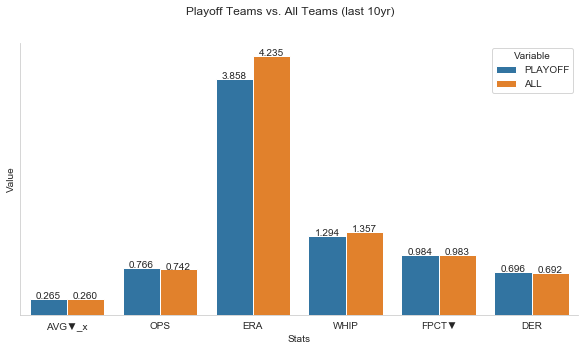

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
graph_df = feature_df.melt(id_vars='CATE').rename(columns=str.title)
sns.barplot(x='Cate', y='Value', hue='Variable', data=graph_df, ax=ax)
sns.despine(fig)
ax.set_xlabel('Stats')

ax.grid(False)
ax.set_yticks([])

fig.suptitle('Playoff Teams vs. All Teams (last 10yr)')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = '{:.3f}'.format(y_value)
    plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)
plt.show()

#### There are significant difference between to category.

Let's try to make a classification model

## Modeling

### First model - Logistic Regression

In [27]:
# import functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
import itertools


In [28]:
X = df[features]

In [29]:
X.head()

,AVG▼_x,OPS,ERA,WHIP,FPCT▼,DER
0,0.268,0.792,3.75,1.25,0.987,0.694
1,0.259,0.766,3.77,1.20,0.986,0.689
2,0.258,0.740,3.74,1.20,0.986,0.709
3,0.258,0.744,3.65,1.31,0.983,0.702
4,0.257,0.742,3.75,1.28,0.986,0.710


In [30]:
# Set target variable
y = df['Playoff']

In [31]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Playoff, dtype: float64

In [32]:
# Split dataset for train & test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=27)

In [33]:
# Set a pipeline with Scaler and Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs',
                                      random_state=27))
])

In [34]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=27,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [35]:
# Get score for evaluation
pipeline.score(X_test, y_test)

0.8245614035087719

In [36]:
# Get score with train data
pipeline.score(X_train, y_train)

0.8903508771929824

In [37]:
# get prediction values
train_predicts = pipeline.predict(X_train)
test_predicts = pipeline.predict(X_test)

#### Evaluate the model

In [38]:
# classification report
print(classification_report(y_test, test_predicts))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        88
         1.0       0.64      0.54      0.58        26

    accuracy                           0.82       114
   macro avg       0.75      0.72      0.74       114
weighted avg       0.82      0.82      0.82       114



In [39]:
print(classification_report(y_train, train_predicts))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       330
         1.0       0.83      0.75      0.79       126

    accuracy                           0.89       456
   macro avg       0.87      0.85      0.86       456
weighted avg       0.89      0.89      0.89       456



#### Draw Confusion Matrix with matplotlib

In [40]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    """Draw a confusion matrix with matplotlib"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
        
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], 
                 horizontalalignment='center',
                 verticalalignment='top' if i == 0 else 'bottom',
                 color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

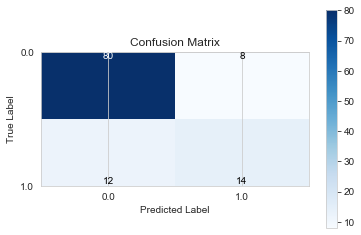

In [41]:
# Draw confusion matrix
show_cf(y_test, test_predicts)

### Playoff odds on 7/31/19    

#### Let's see Seattle first (actually I live in Seattle area)


Seattle Mariners  (W : 47 -  L : 63, PCT : .427)
- Batting AVG : .245
- OPS : .767
- ERA : 5.20
- WHIP : 1.41
- FPCT : .975
- DER : .686


In [42]:
# Mariners
mariners_0731 = [[.242, .763, 5.20, 1.41, .975, .686]]
proba = pipeline.predict_proba(mariners_0731)
print(f'Playoff odds for Seattle Mariners is {proba[0][1] * 100:0.2f}%. :(')

Playoff odds for Seattle Mariners is 0.17%. :(


#### Now let's predict AL wild card

**Oakland  (W : 61 -  L : 47, PCT : .565,  AL Wildcard Leader)**

- Batting AVG : .246
- OPS : .761
- ERA : 4.10
- WHIP : 1.27
- FPCT : .986
- DER : .711



In [43]:
# Athletics
athletics_0731 = [[.246, .761, 4.10, 1.27, .986, .711]]
proba = pipeline.predict_proba(athletics_0731)
print(f'Playoff odds for Oakland Athletics is {proba[0][1] * 100:0.2f}%.')

Playoff odds for Oakland Athletics is 25.34%.


**Tempa Bay  (W : 61 -  L : 48, PCT : .565,  AL WCGB : 0.5)**

- Batting AVG : .254
- OPS : .757
- ERA : 3.56
- WHIP : 1.17
- FPCT : .987
- DER : .701



In [44]:
# Rays
rays_0731 = [[.254, .757, 3.56, 1.17, .987, .701]]
proba = pipeline.predict_proba(rays_0731)
print(f'Playoff odds for Tempa Bay Rays is {proba[0][1] * 100:0.2f}%.')

Playoff odds for Tempa Bay Rays is 86.32%.


*My model says Rays has much higher probability than Atheltics's*

#### How about LA Dodgers? 

Actually LA dominates NL in 2019 season.

**LA Dodgers  (W : 71 - L : 39, PCT : .645)**


- Batting AVG : .260
- OPS : .808
- ERA : 3.39
- WHIP : 1.11
- FPCT : .980
- DER : .713

In [45]:
dodgers_0731 = [[.260, .808, 3.39, 1.11, .980, .713]]

In [46]:
proba = pipeline.predict_proba(dodgers_0731)

In [47]:
print(f'Playoff odds for LA Dodgers is {proba[0][1] * 100:0.2f}%.')

Playoff odds for LA Dodgers is 99.45%.


*Base on my prediction model LA Dodgers definately advance to playoffs*

### What is Next?

- Try to make a model with more classification methods (KNN, SVM, ...)
- Try to use the other features such as League, hits per a game, ...
- Make a simple app for check every teams


### Make a function for evaluating the model

In [48]:
def evalute_model(pipeline, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=27)
    # train model
    pipeline.fit(X_train, y_train)
    
    # check score of model
    print('--------------------------------------------------------')
    print('model score with test dataset: ', 
          pipeline.score(X_test, y_test))

    
    # check classification_report
    predictions = pipeline.predict(X_test)

    # f1 score
    print('--------------------------------------------------------')
    print('f1 score with test dataset: ', 
          f1_score(y_test, predictions))


    print('--------------------------------------------------------')
    print(classification_report(y_test, predictions))
    print('--------------------------------------------------------')



### Let's try with KNN method

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [50]:
# make a pipeline with KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])


In [51]:
evalute_model(pipeline, X, y)

--------------------------------------------------------
model score with test dataset:  0.8070175438596491
--------------------------------------------------------
f1 score with test dataset:  0.5599999999999999
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        88
         1.0       0.58      0.54      0.56        26

    accuracy                           0.81       114
   macro avg       0.73      0.71      0.72       114
weighted avg       0.80      0.81      0.80       114

--------------------------------------------------------


In [52]:
# Find best K value for KNN
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier(n_neighbors=k))
        ])

        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        f1 = f1_score(y_test, predictions)
        
#         print(f'{k} : {f1}')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [53]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
F1-Score: 0.6153846153846154


In [54]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=1))
   
])

In [55]:
evalute_model(pipeline, X, y)

--------------------------------------------------------
model score with test dataset:  0.8245614035087719
--------------------------------------------------------
f1 score with test dataset:  0.6153846153846154
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        88
         1.0       0.62      0.62      0.62        26

    accuracy                           0.82       114
   macro avg       0.75      0.75      0.75       114
weighted avg       0.82      0.82      0.82       114

--------------------------------------------------------


#### f1 score for KNN is not so good.

### Let's try with SVM (Support Vector Machine) method

In [56]:
from sklearn import svm

In [57]:
# make a pipeline with SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', svm.SVC(kernel='linear'))
])


In [58]:
evalute_model(pipeline, X, y)

--------------------------------------------------------
model score with test dataset:  0.8070175438596491
--------------------------------------------------------
f1 score with test dataset:  0.5217391304347826
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        88
         1.0       0.60      0.46      0.52        26

    accuracy                           0.81       114
   macro avg       0.73      0.69      0.70       114
weighted avg       0.79      0.81      0.80       114

--------------------------------------------------------


### Let's try with XGBoost method

In [59]:
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [60]:
xgb_pp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier())
])

In [61]:
evalute_model(xgb_pp, X, y)

--------------------------------------------------------
model score with test dataset:  0.8070175438596491
--------------------------------------------------------
f1 score with test dataset:  0.5416666666666667
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        88
         1.0       0.59      0.50      0.54        26

    accuracy                           0.81       114
   macro avg       0.72      0.70      0.71       114
weighted avg       0.80      0.81      0.80       114

--------------------------------------------------------


In [62]:
# find best XGBoost parameters
param_grid = {
    "learning_rate": [0.1, 0.2],
    'max_depth': [15],
    'min_child_weight': [15],
    'subsample': [0.2, 0.5, 0.8],
    'n_estimators': [5, 30, 100, 250, 500, 1000],
}

In [63]:
clf = xgb.XGBClassifier()

In [64]:
ss = StandardScaler()

In [65]:
# Split dataset for train & test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=27)

In [66]:
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

In [67]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid_clf.fit(scaled_X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(scaled_X_train)
val_preds = grid_clf.predict(scaled_X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 15
min_child_weight: 15
n_estimators: 250
subsample: 0.8

Training Accuracy: 85.96%
Validation accuracy: 80.7%


In [68]:
xgb_pp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(max_depth=15, 
                                     learning_rate=0.2, 
                                     min_child_weight=15,
                                     n_estimators=250,
                                     subsample=0.8
                                    ))
])

In [69]:
evalute_model(xgb_pp, X, y)

--------------------------------------------------------
model score with test dataset:  0.7982456140350878
--------------------------------------------------------
f1 score with test dataset:  0.4888888888888889
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        88
         1.0       0.58      0.42      0.49        26

    accuracy                           0.80       114
   macro avg       0.71      0.67      0.68       114
weighted avg       0.78      0.80      0.79       114

--------------------------------------------------------


### With Random Forest method

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc_pp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth= 5))
])

In [72]:
evalute_model(rfc_pp, X, y)

--------------------------------------------------------
model score with test dataset:  0.8070175438596491
--------------------------------------------------------
f1 score with test dataset:  0.5416666666666667
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        88
         1.0       0.59      0.50      0.54        26

    accuracy                           0.81       114
   macro avg       0.72      0.70      0.71       114
weighted avg       0.80      0.81      0.80       114

--------------------------------------------------------


### Try with Naive Bayes method

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gbn_pp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

In [75]:
evalute_model(gbn_pp, X, y)

--------------------------------------------------------
model score with test dataset:  0.8421052631578947
--------------------------------------------------------
f1 score with test dataset:  0.6538461538461539
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        88
         1.0       0.65      0.65      0.65        26

    accuracy                           0.84       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.84      0.84      0.84       114

--------------------------------------------------------


### More features

Gaussian Navie Bayes shows the best performance but it has still low f1 score,  
Let's try with other features such as hits, runs, homeruns, and so forth.


In [76]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Year,2018,2018,2018,2018,2018
RK_x,1,2,3,4,5
Team,Boston Red Sox,Cleveland Indians,Tampa Bay Rays,Chicago Cubs,Atlanta Braves
League_x,AL,AL,AL,NL,NL
G_x,162,162,162,163,162
AB,5623,5595,5475,5624,5582
R_x,876,818,716,761,759
H_x,1509,1447,1415,1453,1433
2B,355,297,274,286,314


#### Labeling League Name

for modeling, change 'AL' to 0 and 'NL' to 1

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()

In [79]:
df['League_x'] = le.fit_transform(df['League_x'])

In [80]:
df.head()

,Unnamed: 0,Year,RK_x,Team,League_x,G_x,AB,R_x,H_x,2B,...,E,DP,SB_y,CS_y,SBPCT,PB,C_WP,FPCT▼,DER,Playoff
0,0,2018.0,1,Boston Red Sox,0,162,5623,876,1509,355,...,77,106,64,30,0.681,25,51,0.987,0.694,1.0
1,1,2018.0,2,Cleveland Indians,0,162,5595,818,1447,297,...,83,123,81,29,0.736,9,54,0.986,0.689,1.0
2,2,2018.0,3,Tampa Bay Rays,0,162,5475,716,1415,274,...,85,136,78,27,0.743,17,55,0.986,0.709,0.0
3,3,2018.0,4,Chicago Cubs,1,163,5624,761,1453,286,...,104,155,84,40,0.677,12,46,0.983,0.702,1.0
4,4,2018.0,5,Atlanta Braves,1,162,5582,759,1433,314,...,80,134,102,28,0.785,13,61,0.986,0.710,1.0


#### Check model with adding league value to basic ratio features

In [81]:
features = ['League_x', 'AVG▼_x', 'OPS' , 'ERA', 'WHIP', 'FPCT▼', 'DER']

In [82]:
X = df[features]

In [83]:
evalute_model(gbn_pp, X, y)

--------------------------------------------------------
model score with test dataset:  0.8421052631578947
--------------------------------------------------------
f1 score with test dataset:  0.6538461538461539
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        88
         1.0       0.65      0.65      0.65        26

    accuracy                           0.84       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.84      0.84      0.84       114

--------------------------------------------------------


In [84]:
# features = ['AVG▼_x', 'OPS' , 'ERA', 'WHIP', 'FPCT▼', 'DER']
new_features = ['League_x', 'G_x', 'R_x', 'H_x', 'HR_x', 'G_y', 'R_y', 'H_y', 'ER']

In [85]:
new_df = df[new_features]

In [86]:
new_df['R'] = new_df['R_x'] / new_df['G_x']
new_df['H'] = new_df['H_x'] / new_df['G_x']
new_df['HR'] = new_df['HR_x'] / new_df['G_x']

new_df['R_allow'] = new_df['R_y'] / new_df['G_y']
new_df['H_allow'] = new_df['H_y'] / new_df['G_y']
new_df['ER'] = new_df['ER'] / new_df['G_y']


/Users/teo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/teo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/teo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [87]:
new_df.head()

,League_x,G_x,R_x,H_x,HR_x,G_y,R_y,H_y,ER,R,H,HR,R_allow,H_allow
0,0,162,876,1509,208,162,647,1305,3.753086,5.407407,9.314815,1.283951,3.993827,8.055556
1,0,162,818,1447,216,162,648,1349,3.771605,5.049383,8.932099,1.333333,4.000000,8.327160
2,0,162,716,1415,150,162,646,1236,3.716049,4.419753,8.734568,0.925926,3.987654,7.629630
3,1,163,761,1453,167,163,645,1319,3.668712,4.668712,8.914110,1.024540,3.957055,8.092025
4,1,162,759,1433,175,162,657,1236,3.746914,4.685185,8.845679,1.080247,4.055556,7.629630


In [88]:
new_X = new_df[['League_x', 'R', 'H', 'HR', 'ER', 'R_allow', 'H_allow']]

In [89]:
evalute_model(gbn_pp, new_X, y)

--------------------------------------------------------
model score with test dataset:  0.8245614035087719
--------------------------------------------------------
f1 score with test dataset:  0.6428571428571429
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        88
         1.0       0.60      0.69      0.64        26

    accuracy                           0.82       114
   macro avg       0.75      0.78      0.76       114
weighted avg       0.84      0.82      0.83       114

--------------------------------------------------------


In [90]:
lr_pp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs',
                                      random_state=27))
])

In [91]:
evalute_model(lr_pp, new_X, y)

--------------------------------------------------------
model score with test dataset:  0.8508771929824561
--------------------------------------------------------
f1 score with test dataset:  0.6382978723404256
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91        88
         1.0       0.71      0.58      0.64        26

    accuracy                           0.85       114
   macro avg       0.80      0.75      0.77       114
weighted avg       0.84      0.85      0.85       114

--------------------------------------------------------


## Deal with real data

In [92]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-colorblind')

In [101]:
def draw_bar_chart(predicts, title):
    """Draw a bar chart with Seaborn"""
    # Draw chart with Seaborn
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=list(predicts.keys()), y=list(predicts.values()), ax=ax)
    sns.despine(fig)

    ax.grid(False)
    ax.set_yticks([])

    fig.suptitle(title, fontsize=20)

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.1f}%'.format(y_value)
        plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)
    
    filename = 'output.png'
    fig.savefig(filename)
    plt.show()


In [94]:
# Using Gaussian Naive Bayes
gnb_pp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])
gnb_pp.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [95]:
# current(2nd of September) stat of AL/NL
# mariners_0731 = [[.242, .763, 5.20, 1.41, .975, .686]]

stat_AL_0902 = {
    # EAST
    'NYY': [0, .270, .828, 4.44, 1.31, .982, .696],
    'TB':  [0, .254, .756, 3.66, 1.19, .985, .695],
    'BOS': [0, .275, .826, 4.68, 1.37, .985, .677],
    'TOR': [0, .236, .727, 4.71, 1.43, .984, .688],
    'BAL': [0, .246, .721, 5.77, 1.47, .981, .692],
    
    # CENTRAL
    'MIN': [0, .273, .842, 4.16, 1.30, .981, .678],
    'CLE': [0, .251, .761, 3.67, 1.21, .984, .698],
    'CWS': [0, .255, .707, 4.96, 1.44, .979, .679],
    'KC':  [0, .243, .704, 5.15, 1.47, .987, .678],
    'DET': [0, .238, .682, 5.19, 1.45, .981, .677],

    # WEST
    'HOU': [0, .274, .839, 3.69, 1.14, .987, .722],
    'OAK': [0, .249, .772, 4.06, 1.26, .986, .711],
    'TEX': [0, .246, .748, 4.86, 1.44, .982, .677],
    'LAA': [0, .252, .762, 5.01, 1.37, .983, .694],
    'SEA': [0, .241, .756, 5.04, 1.39, .977, .689],
}

In [96]:
al_predicts = {}
for team, value in stat_AL_0902.items():
    proba = gnb_pp.predict_proba([value])[0][1]*100
    al_predicts[team] = proba
    print(f'{team} :  {proba:.3}%')

NYY :  68.9%
TB :  86.8%
BOS :  20.1%
TOR :  0.129%
BAL :  0.000121%
MIN :  65.2%
CLE :  85.6%
CWS :  0.00729%
KC :  0.0031%
DET :  0.000381%
HOU :  99.8%
OAK :  86.2%
TEX :  0.0652%
LAA :  0.967%
SEA :  0.0157%


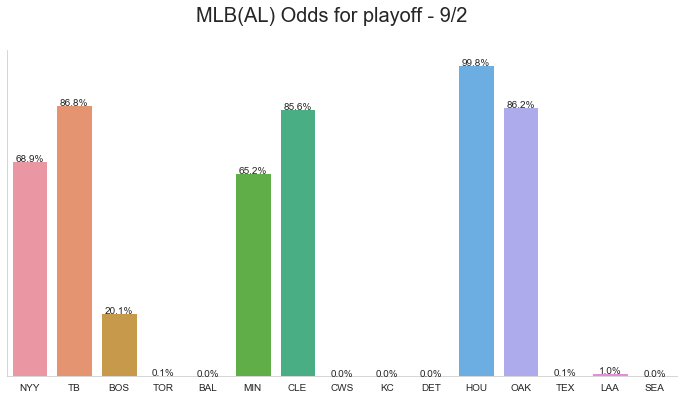

In [102]:
draw_bar_chart(al_predicts, 'MLB(AL) Odds for playoff - 9/2')

In [98]:
stat_NL_0902 = {
    # EAST
    'ATL': [1, .260, .794, 4.24, 1.39, .986, .683],
    'WSH': [1, .264, .795, 4.31, 1.30, .985, .688],
    'PHI': [1, .248, .750, 4.60, 1.38, .984, .690],
    'NYM': [1, .257, .762, 4.34, 1.32, .982, .682],
    'MIA': [1, .239, .663, 4.77, 1.34, .984, .714],


    # CENTRAL
    'STL': [1, .247, .731, 3.89, 1.26, .988, .710],
    'CHC': [1, .251, .778, 4.04, 1.30, .982, .694],
    'MIL': [1, .248, .768, 4.63, 1.37, .984, .690],
    'CIN': [1, .247, .744, 4.23, 1.28, .985, .695],
    'PIT': [1, .268, .755, 5.06, 1.43, .980, .674],


    # WEST
    'LAD': [1, .260, .820, 3.45, 1.11, .982, .711],    
    'ARI': [1, .258, .776, 4.39, 1.32, .987, .693],
    'SF':  [1, .242, .710, 4.45, 1.31, .985, .697],
    'SD':  [1, .244, .736, 4.60, 1.30, .980, .686],
    'COL': [1, .268, .784, 5.67, 1.51, .983, .674],
}


In [99]:
nl_predicts = {}
for team, value in stat_NL_0902.items():
    proba = gnb_pp.predict_proba([value])[0][1]*100
    nl_predicts[team] = proba
    print(f'{team} :  {proba:.3}%')

ATL :  26.4%
WSH :  62.8%
PHI :  2.47%
NYM :  12.9%
MIA :  0.205%
STL :  68.7%
CHC :  48.8%
MIL :  4.03%
CIN :  30.1%
PIT :  0.0504%
LAD :  98.1%
ARI :  43.0%
SF :  3.82%
SD :  0.951%
COL :  0.000913%


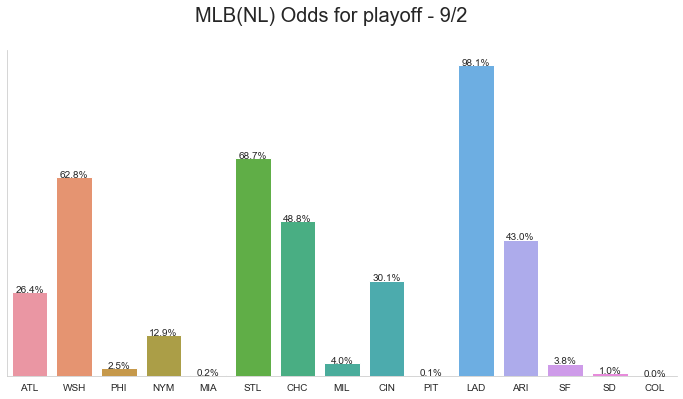

In [103]:
draw_bar_chart(nl_predicts, 'MLB(NL) Odds for playoff - 9/2')